**Background:**

You have been provided with a dataset representing the daily swimming distances of 15 swimmers over the years 2019 and 2020. This dataset is a simulated model and does not represent real-world data.

**Task:**

Your goal is to analyze this dataset to understand trends in swimming distances and identify any notable patterns or outliers among the swimmers.

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import scale 
import seaborn as sns

# Load the dataset
df = pd.read_csv('daily_swimming_distance_2019_2020.csv') 

# Convert the column names (which are dates) into a datetime format
df.columns = [datetime.strptime(date, '%m/%d/%Y') if '/' in date else date for date in df.columns]
# Reshape the DataFrame from wide format to long format
df_long = df.melt(id_vars=['Swimmer'], var_name='Date', value_name='Distance')

df_long["Month"] = np.nan

# Group by Swimmer and month, and sum the distances
for index, row in df_long.iterrows():
    if row['Date'].year == 2019:
        df_long.at[index, 'Month'] = int(row['Date'].month)
        #row['Month'] = row['Date'].month
    else:
        df_long.at[index, 'Month'] = int(row['Date'].month + 12)

df_long=df_long.drop(columns=['Date'])

df_monthly = df_long.groupby(['Swimmer', 'Month']).sum().reset_index()

with pd.option_context('display.max_rows', None,):
   print(df_monthly)

        Swimmer  Month      Distance
0     Swimmer 1    1.0  71850.504074
1     Swimmer 1    2.0  62912.205640
2     Swimmer 1    3.0  69639.506391
3     Swimmer 1    4.0  51118.255907
4     Swimmer 1    5.0  73367.804805
5     Swimmer 1    6.0  97758.418068
6     Swimmer 1    7.0  76020.798506
7     Swimmer 1    8.0  80844.618926
8     Swimmer 1    9.0  76083.522391
9     Swimmer 1   10.0  77978.033315
10    Swimmer 1   11.0  69916.659794
11    Swimmer 1   12.0  63681.642328
12    Swimmer 1   13.0  70020.691564
13    Swimmer 1   14.0  67158.429253
14    Swimmer 1   15.0  70888.454716
15    Swimmer 1   16.0  65064.968960
16    Swimmer 1   17.0  70448.245882
17    Swimmer 1   18.0  62703.425822
18    Swimmer 1   19.0  70293.474430
19    Swimmer 1   20.0  69016.639228
20    Swimmer 1   21.0  58680.231024
21    Swimmer 1   22.0  66071.053146
22    Swimmer 1   23.0  79476.876540
23    Swimmer 1   24.0  86440.164938
24   Swimmer 10    1.0  68521.851468
25   Swimmer 10    2.0  56637.146446
2

**Convert days to month**

In [7]:
with pd.option_context('display.max_rows', None,):
   print(df_long)

          Swimmer     Distance  Month
0       Swimmer 1  3890.365552    1.0
1       Swimmer 2  4065.478323    1.0
2       Swimmer 3   686.977400    1.0
3       Swimmer 4  3804.435523    1.0
4       Swimmer 5  2257.042949    1.0
5       Swimmer 6  1413.657499    1.0
6       Swimmer 7   799.904456    1.0
7       Swimmer 8   696.866282    1.0
8       Swimmer 9  2733.074573    1.0
9      Swimmer 10  1694.849615    1.0
10     Swimmer 11   943.168419    1.0
11     Swimmer 12  3528.132004    1.0
12     Swimmer 13  1869.116144    1.0
13     Swimmer 14   666.529126    1.0
14     Swimmer 15  3774.799611    1.0
15      Swimmer 1  4472.320001    1.0
16      Swimmer 2  1060.922728    1.0
17      Swimmer 3  3214.927641    1.0
18      Swimmer 4  1408.807760    1.0
19      Swimmer 5  4500.699286    1.0
20      Swimmer 6  1707.022376    1.0
21      Swimmer 7   880.528582    1.0
22      Swimmer 8  4898.429612    1.0
23      Swimmer 9   797.205494    1.0
24     Swimmer 10   639.806708    1.0
25     Swimm

In [8]:
# Reshape the DataFrame from wide format to long format
df_long = df.melt(id_vars=['Swimmer'], var_name='Date', value_name='Distance')

df_long["Month"] = np.nan

# Group by Swimmer and month, and sum the distances
for index, row in df_long.iterrows():
    if row['Date'].year == 2019:
        df_long.at[index, 'Month'] = int(row['Date'].month)
        #row['Month'] = row['Date'].month
    else:
        df_long.at[index, 'Month'] = int(row['Date'].month + 12)

df_long

,Swimmer,Date,Distance,Month
0,Swimmer 1,2019-01-01 00:00:00,3890.365552,1.0
1,Swimmer 2,2019-01-01 00:00:00,4065.478323,1.0
2,Swimmer 3,2019-01-01 00:00:00,686.977400,1.0
3,Swimmer 4,2019-01-01 00:00:00,3804.435523,1.0
4,Swimmer 5,2019-01-01 00:00:00,2257.042949,1.0
...,...,...,...,...
10960,Swimmer 11,2020-12-31 00:00:00,546.759465,24.0
10961,Swimmer 12,2020-12-31 00:00:00,4443.016296,24.0
10962,Swimmer 13,2020-12-31 00:00:00,675.699997,24.0
10963,Swimmer 14,2020-12-31 00:00:00,1852.986894,24.0


In [9]:
df_long=df_long.drop(columns=['Date'])

df_monthly = df_long.groupby(['Swimmer', 'Month']).sum().reset_index()

with pd.option_context('display.max_rows', None,):
   print(df_monthly)

        Swimmer  Month      Distance
0     Swimmer 1    1.0  71850.504074
1     Swimmer 1    2.0  62912.205640
2     Swimmer 1    3.0  69639.506391
3     Swimmer 1    4.0  51118.255907
4     Swimmer 1    5.0  73367.804805
5     Swimmer 1    6.0  97758.418068
6     Swimmer 1    7.0  76020.798506
7     Swimmer 1    8.0  80844.618926
8     Swimmer 1    9.0  76083.522391
9     Swimmer 1   10.0  77978.033315
10    Swimmer 1   11.0  69916.659794
11    Swimmer 1   12.0  63681.642328
12    Swimmer 1   13.0  70020.691564
13    Swimmer 1   14.0  67158.429253
14    Swimmer 1   15.0  70888.454716
15    Swimmer 1   16.0  65064.968960
16    Swimmer 1   17.0  70448.245882
17    Swimmer 1   18.0  62703.425822
18    Swimmer 1   19.0  70293.474430
19    Swimmer 1   20.0  69016.639228
20    Swimmer 1   21.0  58680.231024
21    Swimmer 1   22.0  66071.053146
22    Swimmer 1   23.0  79476.876540
23    Swimmer 1   24.0  86440.164938
24   Swimmer 10    1.0  68521.851468
25   Swimmer 10    2.0  56637.146446
2

**Data Analysis:**
Identify the swimmers with the highest average monthly distance and the most consistent performance over the two years.

In [10]:
# Calculate the average monthly distance for each swimmer
average_monthly_distances = df_monthly.groupby('Swimmer')['Distance'].mean().sort_values(ascending=False)

# Identify the swimmers with the highest average monthly distance
print("Swimmers with the highest average monthly distance:")
print(average_monthly_distances.head(3))

Swimmers with the highest average monthly distance:
Swimmer
Swimmer 1    71143.109402
Swimmer 8    70803.247814
Swimmer 5    70421.657882
Name: Distance, dtype: float64


In [11]:
# Calculate the standard deviation to assess consistency (lower standard deviation means more consistent performance)
consistency = df_monthly.groupby('Swimmer')['Distance'].std().sort_values(ascending=True)

# Identify the swimmers with the most consistent performance
print("\nSwimmers with the most consistent performance:")
print(consistency.head(3))


Swimmers with the most consistent performance:
Swimmer
Swimmer 15    6177.582657
Swimmer 12    6696.277199
Swimmer 8     6840.716092
Name: Distance, dtype: float64


**Identify swimmers with the highest variance** 

In [13]:
# Calculate the variance for each swimmer
variances = df_monthly.groupby('Swimmer')['Distance'].var().sort_values(ascending=False)

# Identify the swimmer with the highest variance
print("Swimmer with the highest variance in monthly swimming distances:")
print(variances.head(3))

Swimmer with the highest variance in monthly swimming distances:
Swimmer
Swimmer 6     8.910104e+07
Swimmer 1     8.898444e+07
Swimmer 10    7.795531e+07
Name: Distance, dtype: float64


**Predictive Modeling:**
**Fit a linear regression model for each of the top swimmers.**

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Fit a linear regression model for each of the top three swimmers
top_swimmers = average_monthly_distances.head(3).index

# Fit a linear regression model for each of the top three swimmers
models = {}
for swimmer in top_swimmers:
    swimmer_data = df_monthly[df_monthly['Swimmer'] == swimmer]
    X = swimmer_data['Month'].values.reshape(-1, 1)  # Months as numeric values
    y = swimmer_data['Distance'].values  # Distance values

    model = LinearRegression()
    model.fit(X, y)
    models[swimmer] = model
    
# Output the models
for swimmer, model in models.items():
    print(f"Model for {swimmer}: Coefficients: {model.coef_}, Intercept: {model.intercept_}")

Model for Swimmer 1: Coefficients: [-14.22189704], Intercept: 71320.88311500124
Model for Swimmer 8: Coefficients: [-322.37655949], Intercept: 74832.95480802795
Model for Swimmer 5: Coefficients: [66.80804001], Intercept: 69586.55738221173


**Predict future performances of top 3 swimmers**

In [16]:
# Predict future performances for the next 6 months
future_months = np.array([df_monthly['Month'].max() + i for i in range(1, 7)]).reshape(-1, 1)
predictions = {}
for swimmer, model in models.items():
    swimmer_predictions = model.predict(future_months)
    predictions[swimmer] = swimmer_predictions

# Output the predictions
for swimmer, swimmer_predictions in predictions.items():
    print(f"Predictions for {swimmer} for the next 6 months:")
    for month, prediction in zip(range(1, 7), swimmer_predictions):
        print(f"Month +{month}: {prediction:.2f} meters")
    print()

Predictions for Swimmer 1 for the next 6 months:
Month +1: 70965.34 meters
Month +2: 70951.11 meters
Month +3: 70936.89 meters
Month +4: 70922.67 meters
Month +5: 70908.45 meters
Month +6: 70894.23 meters

Predictions for Swimmer 8 for the next 6 months:
Month +1: 66773.54 meters
Month +2: 66451.16 meters
Month +3: 66128.79 meters
Month +4: 65806.41 meters
Month +5: 65484.03 meters
Month +6: 65161.66 meters

Predictions for Swimmer 5 for the next 6 months:
Month +1: 71256.76 meters
Month +2: 71323.57 meters
Month +3: 71390.37 meters
Month +4: 71457.18 meters
Month +5: 71523.99 meters
Month +6: 71590.80 meters




**Clustering:**
Perform K-Means clustering on the distance data to categorize swimmers into different performance groups.
Identify patterns and group characteristics.

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_monthly

,Swimmer,Month,Distance
0,Swimmer 1,1.0,71850.504074
1,Swimmer 1,2.0,62912.205640
2,Swimmer 1,3.0,69639.506391
3,Swimmer 1,4.0,51118.255907
4,Swimmer 1,5.0,73367.804805
...,...,...,...
355,Swimmer 9,20.0,79703.626675
356,Swimmer 9,21.0,60153.230736
357,Swimmer 9,22.0,70963.183878
358,Swimmer 9,23.0,70440.748825


In [18]:
swimmer_data = df_monthly[df_monthly['Swimmer'] == "Swimmer 1"]

In [19]:
swimmer_data

,Swimmer,Month,Distance
0,Swimmer 1,1.0,71850.504074
1,Swimmer 1,2.0,62912.205640
2,Swimmer 1,3.0,69639.506391
3,Swimmer 1,4.0,51118.255907
4,Swimmer 1,5.0,73367.804805
5,Swimmer 1,6.0,97758.418068
6,Swimmer 1,7.0,76020.798506
7,Swimmer 1,8.0,80844.618926
8,Swimmer 1,9.0,76083.522391
9,Swimmer 1,10.0,77978.033315


In [20]:
swimmer_data = swimmer_data.drop(columns=['Swimmer'])
swimmer_data = swimmer_data.set_index('Month')
swimmer_data

,Distance
Month,
1.0,71850.504074
2.0,62912.205640
3.0,69639.506391
4.0,51118.255907
5.0,73367.804805
6.0,97758.418068
7.0,76020.798506
8.0,80844.618926
9.0,76083.522391


In [21]:
X = swimmer_data.copy()

C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

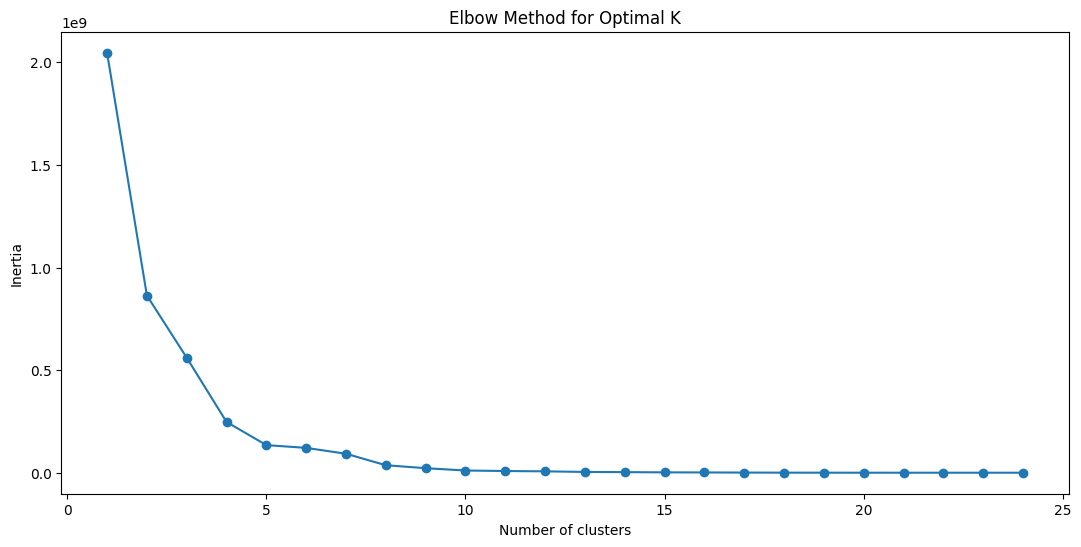

In [22]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(13, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
# Perform clustering on the scaled data
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X)

C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
clusters

array([4, 0, 4, 3, 4, 2, 1, 1, 1, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 3, 0,
       1, 1])

In [25]:
X_scaled=scale(X)
X_scaled

array([[ 0.07660312],
       [-0.89131702],
       [-0.16282379],
       [-2.16847303],
       [ 0.24091023],
       [ 2.88214738],
       [ 0.52820048],
       [ 1.05056757],
       [ 0.53499279],
       [ 0.74014764],
       [-0.1328111 ],
       [-0.80799543],
       [-0.1215456 ],
       [-0.43149736],
       [-0.02757632],
       [-0.65819626],
       [-0.07524613],
       [-0.9139256 ],
       [-0.09200619],
       [-0.23027351],
       [-1.34959367],
       [-0.54924832],
       [ 0.902456  ],
       [ 1.65650412]])

In [26]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Distance
0,0.076603
1,-0.891317
2,-0.162824
3,-2.168473
4,0.240910
5,2.882147
6,0.528200
7,1.050568
8,0.534993
9,0.740148


In [27]:
X_scaled_df['Cluster'] = clusters
X_scaled_df

,Distance,Cluster
0,0.076603,4
1,-0.891317,0
2,-0.162824,4
3,-2.168473,3
4,0.240910,4
5,2.882147,2
6,0.528200,1
7,1.050568,1
8,0.534993,1
9,0.740148,1


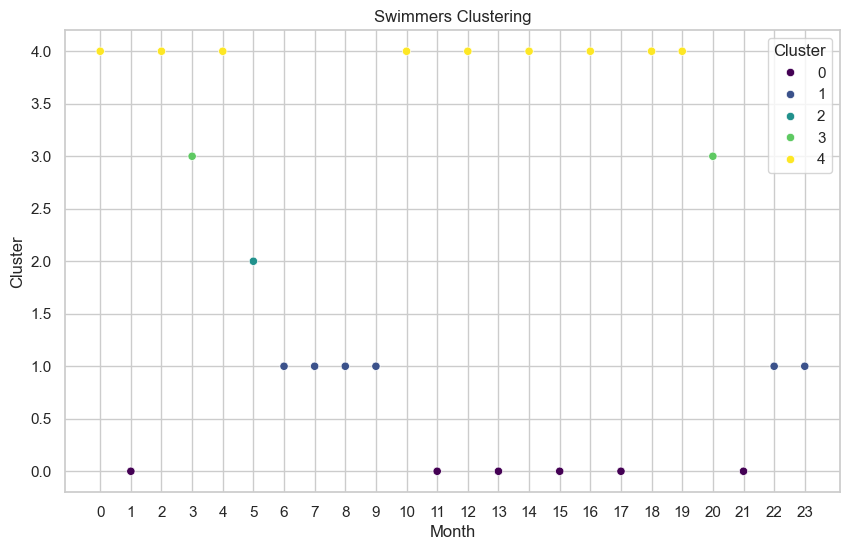

In [28]:
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
#sns.scatterplot(data=X_scaled_df, x='Distance', y='Cluster', hue='Cluster', palette='viridis', legend=False)
g = sns.scatterplot(data=X_scaled_df, x=X_scaled_df.index, y='Cluster', hue='Cluster', palette='viridis', legend=True)

#sns.xticks(range(len(X_scaled_df))) 
g.set_xticks(range(len(X_scaled_df))) 

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Cluster')
plt.title('Swimmers Clustering')

# Show the plot
plt.show()

In [29]:
swimmer_data['Cluster'] = clusters
swimmer_data

,Distance,Cluster
Month,,
1.0,71850.504074,4
2.0,62912.205640,0
3.0,69639.506391,4
4.0,51118.255907,3
5.0,73367.804805,4
6.0,97758.418068,2
7.0,76020.798506,1
8.0,80844.618926,1
9.0,76083.522391,1


In [30]:
swimmer_data

,Distance,Cluster
Month,,
1.0,71850.504074,4
2.0,62912.205640,0
3.0,69639.506391,4
4.0,51118.255907,3
5.0,73367.804805,4
6.0,97758.418068,2
7.0,76020.798506,1
8.0,80844.618926,1
9.0,76083.522391,1


In [31]:
kmeans.cluster_centers_

array([[64598.62085792],
       [79474.00243609],
       [97758.41806808],
       [54899.2434653 ],
       [70604.66454267]])

In [32]:
print(swimmer_data.dtypes)

Distance    float64
Cluster       int32
dtype: object


In [33]:
swimmer_data['Cluster'] = swimmer_data['Cluster'].astype('category')

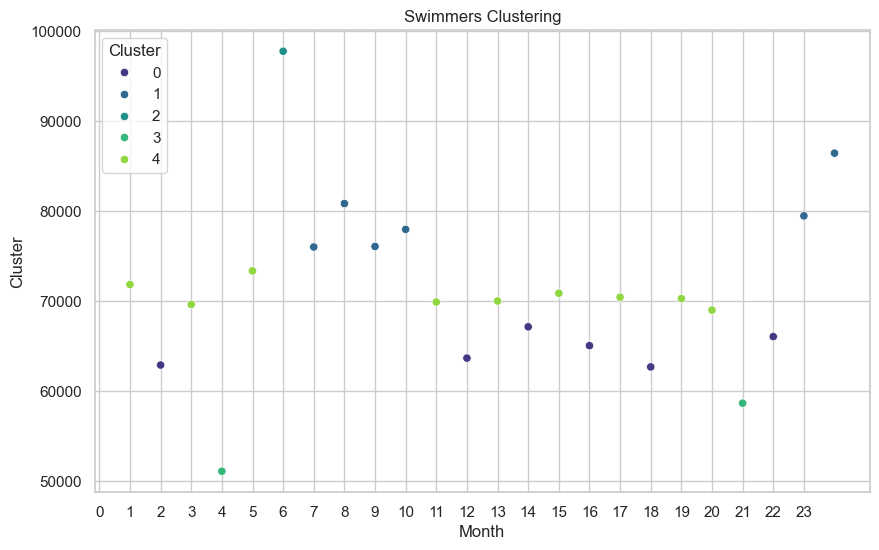

In [34]:
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
#sns.scatterplot(data=X_scaled_df, x='Distance', y='Cluster', hue='Cluster', palette='viridis', legend=False)
#g = sns.scatterplot(data=swimmer_data, x=swimmer_data.index, y='Distance', hue='Cluster',palette='viridis', legend=True)
g = sns.scatterplot(data=swimmer_data, x='Month', y='Distance', hue='Cluster', palette='viridis', legend=True)

#sns.xticks(range(len(X_scaled_df))) 
g.set_xticks(range(len(X_scaled_df))) 

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Cluster')
plt.title('Swimmers Clustering')

# Show the plot
plt.show()

**Outlier Detection:**
Use statistical methods to detect any outliers in the swimming distances.


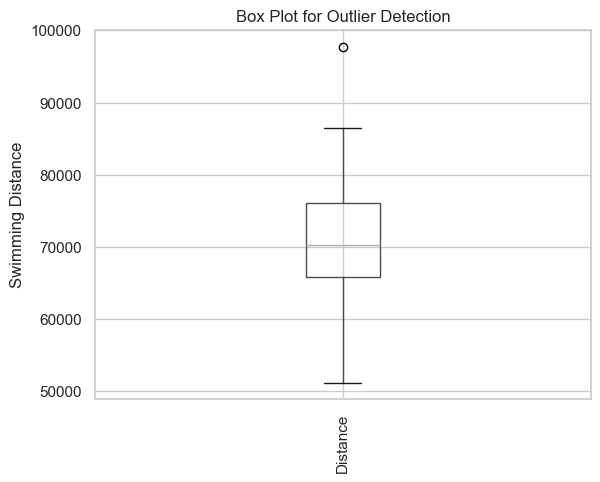

In [35]:
# Box plot for outlier detection
X.boxplot()
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Swimming Distance')
plt.xticks(rotation=90)
plt.show()

**IQR, or Interquartile Range**, is a measure of statistical dispersion and is a key concept in identifying outliers in a dataset. It's the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a dataset. Here's a more detailed explanation:

**Quartiles:** Data is divided into quartiles:

   **Q1 (25th percentile):** The median of the first half of the dataset. 25% of the data points are less than or equal to Q1.
    
   **Q2 (50th percentile or median):** The middle value of the dataset.
    
   **Q3 (75th percentile):** The median of the second half of the dataset. 75% of the data points are less than or equal to Q3.
   
**Interquartile Range (IQR)**: It is calculated as IQR = Q3 - Q1. This range covers the middle 50% of the data.

**Use in Outlier Detection:** IQR is often used to find outliers in data. Outliers are usually considered to be any data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This rule of thumb is effective in practice for many datasets.

**Advantages of IQR:** Unlike range or standard deviation, IQR is not affected by extremes and is therefore a more robust measure of the spread of data, especially useful in datasets with outliers or non-normal distribution.

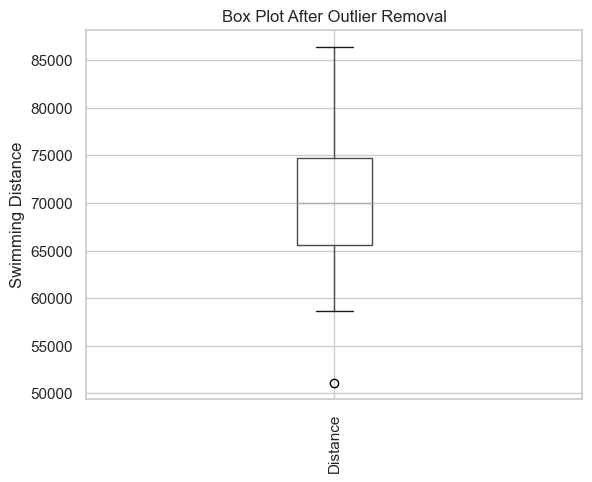

In [36]:
# Identify outliers using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
X_filtered = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]

# Box plot after outlier removal
X_filtered.boxplot()
plt.title('Box Plot After Outlier Removal')
plt.ylabel('Swimming Distance')
plt.xticks(rotation=90)
plt.show()

C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

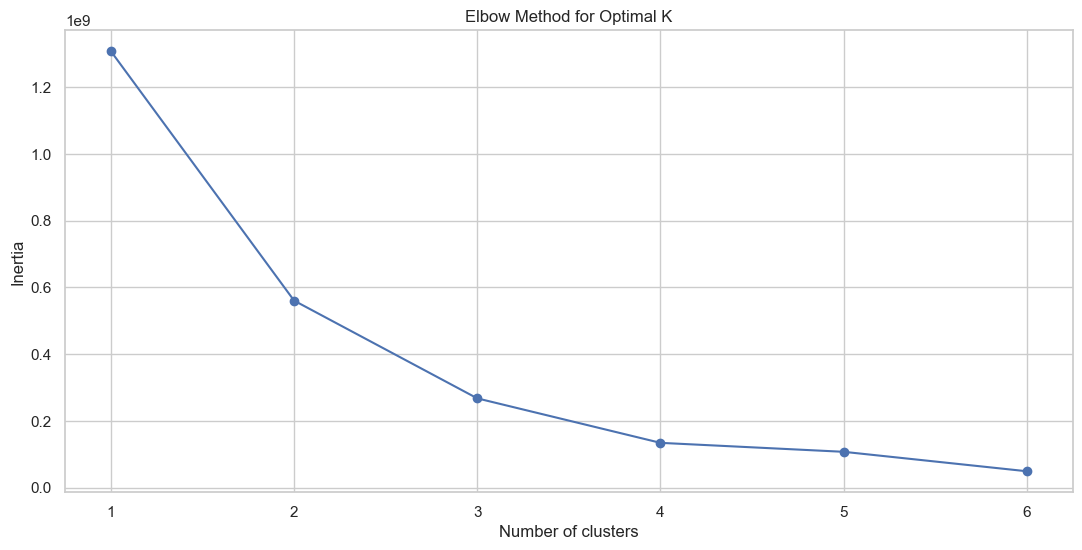

In [37]:

# Determine the optimal number of clusters using the Elbow method again without outliers
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_filtered)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(13, 6))
plt.plot(range(1, 7), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Clustering with optimal K:**

In [38]:
import seaborn as sns
from sklearn.cluster import KMeans

# Filter the DataFrame for the specific swimmers
selected_swimmers = ['Swimmer 1', 'Swimmer 8', 'Swimmer 5']
df_filtered = df_monthly[df_monthly['Swimmer'].isin(selected_swimmers)]

df_filtered

,Swimmer,Month,Distance
0,Swimmer 1,1.0,71850.504074
1,Swimmer 1,2.0,62912.205640
2,Swimmer 1,3.0,69639.506391
3,Swimmer 1,4.0,51118.255907
4,Swimmer 1,5.0,73367.804805
...,...,...,...
331,Swimmer 8,20.0,73376.660905
332,Swimmer 8,21.0,68950.803625
333,Swimmer 8,22.0,54713.502636
334,Swimmer 8,23.0,69437.014991


In [39]:
# Prepare data for clustering (pivot the DataFrame to have selected swimmers as columns and months as rows)
X_selected = df_filtered.pivot(index='Month', columns='Swimmer', values='Distance').fillna(0)

X_selected

Swimmer,Swimmer 1,Swimmer 5,Swimmer 8
Month,,,
1.0,71850.504074,69983.309582,73905.622686
2.0,62912.205640,62105.391704,76863.465740
3.0,69639.506391,72520.157643,71949.422523
4.0,51118.255907,64337.456574,77565.891652
5.0,73367.804805,86577.459984,82209.691979
6.0,97758.418068,68898.623959,58666.981417
7.0,76020.798506,63855.547436,72845.217732
8.0,80844.618926,78861.299672,76981.171618
9.0,76083.522391,64707.142979,63463.936859


In [40]:
# Perform K-Means clustering with optimal k = 7
kmeans_selected = KMeans(n_clusters=6, random_state=0)
clusters_selected = kmeans_selected.fit_predict(X_selected)

clusters_selected

C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([5, 1, 5, 4, 2, 3, 5, 2, 0, 2, 5, 1, 4, 0, 5, 1, 5, 4, 5, 1, 4, 0,
       2, 2])

In [41]:
# Add the cluster information to the DataFrame
X_selected_clustered = X_selected.copy()
X_selected_clustered['Cluster'] = clusters_selected

# Melt the DataFrame for visualization
X_selected_melted = X_selected_clustered.reset_index().melt(id_vars=['Month', 'Cluster'], var_name='Swimmer', value_name='Distance')

X_selected_melted

,Month,Cluster,Swimmer,Distance
0,1.0,5,Swimmer 1,71850.504074
1,2.0,1,Swimmer 1,62912.205640
2,3.0,5,Swimmer 1,69639.506391
3,4.0,4,Swimmer 1,51118.255907
4,5.0,2,Swimmer 1,73367.804805
...,...,...,...,...
67,20.0,1,Swimmer 8,73376.660905
68,21.0,4,Swimmer 8,68950.803625
69,22.0,0,Swimmer 8,54713.502636
70,23.0,2,Swimmer 8,69437.014991


<Axes: xlabel='Month', ylabel='Distance'>

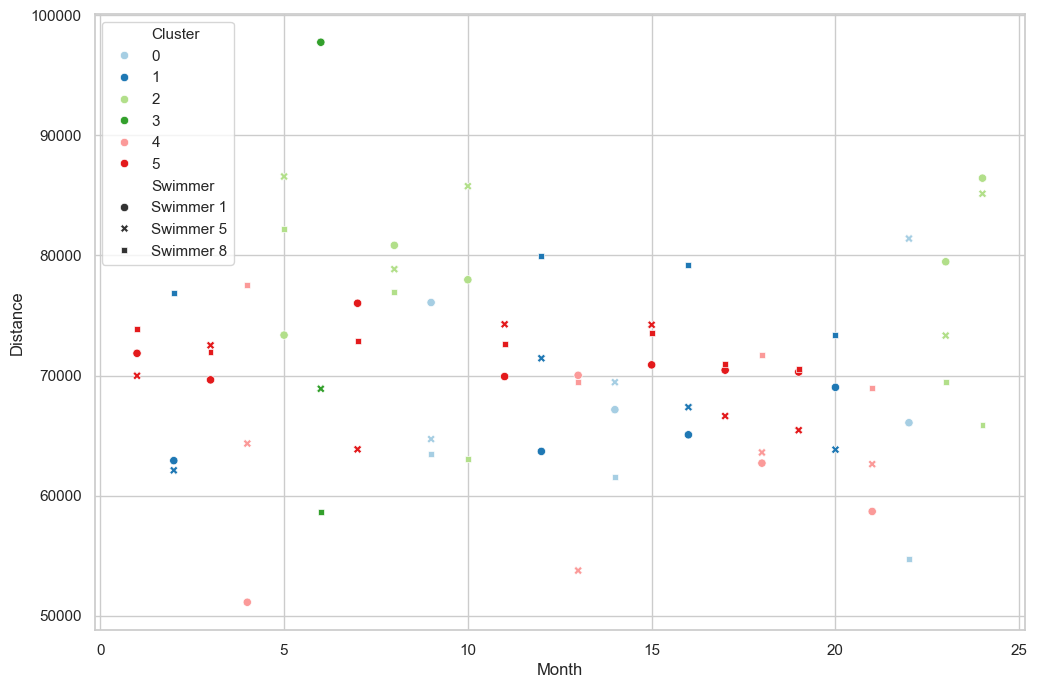

In [42]:
# Visualization using seaborn's scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_selected_melted, x='Month', y='Distance', hue='Cluster', palette='Paired', style='Swimmer')

### Validating clustering
Validating clustering results, especially for unsupervised learning methods like K-Means, can be challenging because, unlike supervised learning, you don't have labeled data to test against. However, there are several methods you can use to assess the quality and validity of your clusters:

**Elbow Method:** This is useful for determining the optimal number of clusters. You've already done this if you've plotted the sum of squared distances (inertia) for different 
k
k values and looked for an 'elbow' in the graph.

**Silhouette Score:** This measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If the majority of your objects have a high value, the clustering configuration is good.

**Cluster Validation Indices:** There are various indices like Davies-Bouldin index or Dunn index that can be used to validate clusters. A lower Davies-Bouldin index relates to a model with better separation between the clusters.

**Visual Inspection:** This is subjective but can be useful. Plotting the clusters and examining their spread and separation can provide insights into their validity. For example, using scatter plots as you did.

**Compare Against Known Benchmarks:** If any known benchmarks or labeled datasets are similar to your data, you can use them to validate your clusters.

**Stability:** If you re-run your clustering multiple times with different subsets of the data and the clusters remain consistent, this can be a sign of good clustering.

**Domain Knowledge:** Sometimes, consulting with domain experts and interpreting the clusters in the context of subject-matter expertise can validate whether the clusters make sense logically.

**Consistency Across Different Methods:** If multiple clustering methods (like hierarchical clustering, DBSCAN, etc.) yield similar results, it increases the confidence in your clusters.

In [43]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score using the data used for clustering and the cluster labels
score = silhouette_score(X_selected, clusters_selected)
print('Silhouette Score:', score)

Silhouette Score: 0.1594549274454753
